In [1]:
import os
import re
import glob
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

In [2]:
def audio_to_spectrogram(audio_path, output_folder):
    """
    Convert an audio file into a spectrogram image and save it.

    Parameters:
    - audio_path: Path to the input audio file.
    - output_folder: Folder where the spectrogram images will be saved.
    """
    # Load the audio file. Limit to the first 2 seconds (sr * duration)
    y, sr = librosa.load(audio_path, sr=None, duration=2.0)
    
    n_fft = 1024
    hop_length = 64

    # Generate a Mel-scaled spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=256, fmax=sr/2)
    
    # Convert the Mel-scaled spectrogram (power) to decibels (log power)
    S_DB = librosa.power_to_db(S, ref=np.max)
    
    # Plotting the spectrogram and removing the axis
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', fmax=sr/2)
    plt.axis('off')  # Removes the axis to have only the spectrogram

    plt.tight_layout(pad=0)

    # Construct the output filename from the audio filename
    base_filename = os.path.splitext(os.path.basename(audio_path))[0]
    output_filename = f"{base_filename}.png"
    output_path = os.path.join(output_folder, output_filename)
    
    # Save the figure
    plt.savefig(output_path, dpi=150, bbox_inches='tight', pad_inches=0) # Increase dpi for better image quality
    plt.close()

In [10]:
AIDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/AI augment voice"
HumanDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Human augment voice"

In [9]:
male = [os.path.basename(x) for x in glob.glob(os.path.join(maleDir, "*.wav"))]
print("Number of files in male path :", len(maleDir))
female = [os.path.basename(x) for x in glob.glob(os.path.join(femaleDir, "*.wav"))]
print("Number of files in female path :", len(femaleDir))

Number of files in male path : 113
Number of files in female path : 115


In [11]:
AIPath = [os.path.basename(x) for x in glob.glob(os.path.join(AIDir, "*.wav"))]
print("Number of files in AI path :", len(AIPath))
HumanPath = [os.path.basename(x) for x in glob.glob(os.path.join(HumanDir, "*.wav"))]
print("Number of files in Human path :", len(HumanPath))

Number of files in AI path : 2000
Number of files in Human path : 2000


In [5]:
AIFolder = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/AI Picture Ver.4"
os.makedirs(AIFolder, exist_ok=True)

for filename in os.listdir(AIDir):
    if filename.endswith(".wav"):
        AIFiles = os.path.join(AIDir, filename)
        audio_to_spectrogram(AIFiles, AIFolder)

NameError: name 'audio_to_spectrogram' is not defined

In [6]:
HumanFolder = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Human Picture Ver.4"
os.makedirs(HumanFolder, exist_ok=True)

for filename in os.listdir(HumanDir):
    if filename.endswith(".wav"):
        HumanFiles = os.path.join(HumanDir, filename)
        audio_to_spectrogram(HumanFiles, HumanFolder)

In [6]:
print(len(os.listdir(AIFolder)))
print(len(os.listdir(HumanFolder)))

2000


NameError: name 'HumanFolder' is not defined

In [12]:
def audio_to_spectrogram_test(audio_path):
    """
    Convert an audio file into a spectrogram image and save it.

    Parameters:
    - audio_path: Path to the input audio file.
    - output_folder: Folder where the spectrogram images will be saved.
    """
    # Load the audio file. Limit to the first 2 seconds (sr * duration)
    y, sr = librosa.load(audio_path, sr=None, duration=2.0)
    
    n_fft = 1024
    hop_length = 64

    # Generate a Mel-scaled spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=256, fmax=sr/2)
  
    # Convert the Mel-scaled spectrogram (power) to decibels (log power)
    S_DB = librosa.power_to_db(S, ref=np.max)
    
    # Plotting the spectrogram and removing the axis
    plt.figure(figsize=(9, 6))
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', fmax=sr/2, cmap = "viridis")
    plt.axis('off')  # Removes the axis to have only the spectrogram
    plt.tight_layout(pad=0)

    plt.show()  

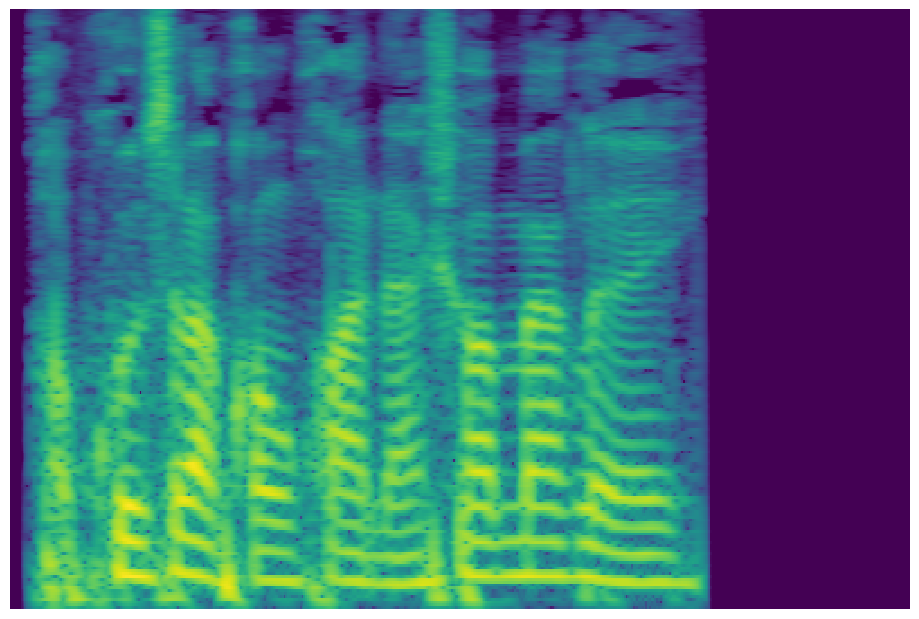

In [13]:
audio_to_spectrogram_test("C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Human augment voice/Jean 1.wav")

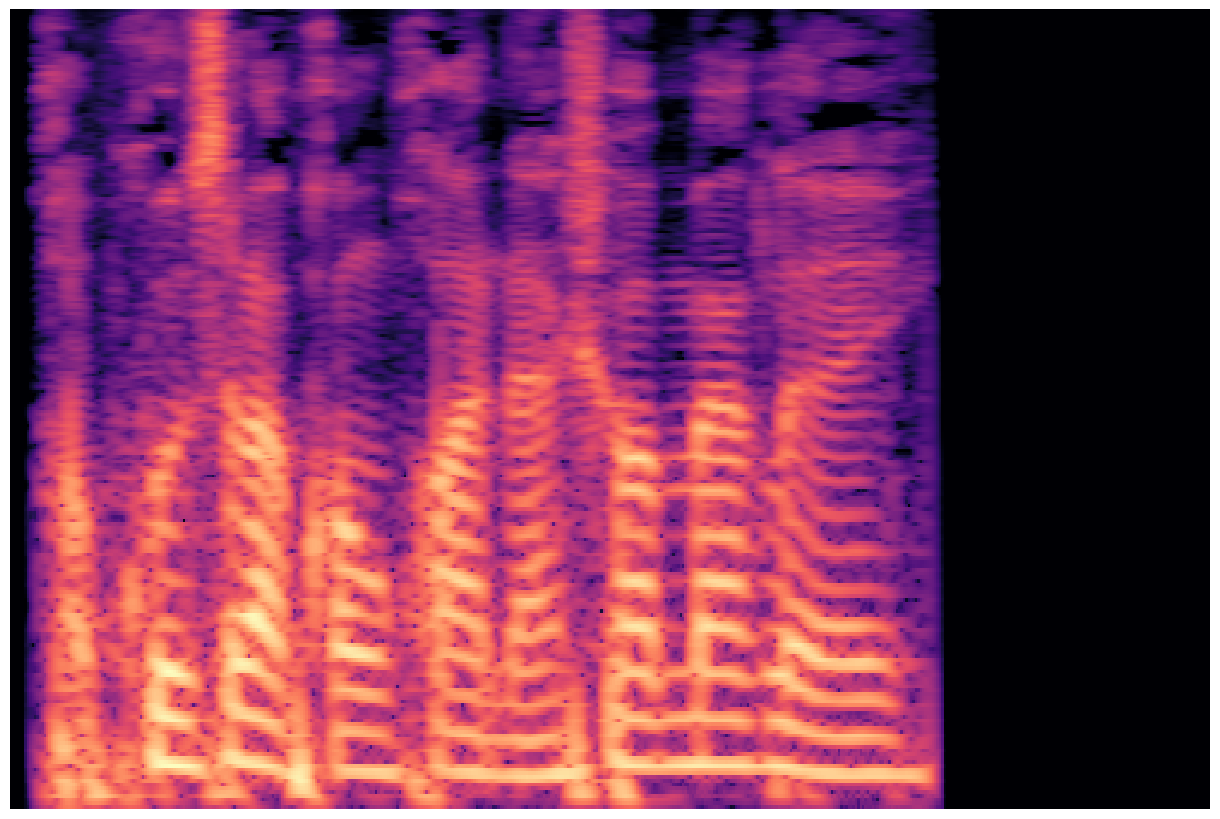

In [9]:
def audio_to_spectrogram_test2(audio_path):
    """
    Convert an audio file into a spectrogram image and save it.

    Parameters:
    - audio_path: Path to the input audio file.
    """
    # Load the audio file. Limit to the first 2 seconds (sr * duration)
    y, sr = librosa.load(audio_path, sr=None, duration=2.0)

    # Ensure that the audio is exactly 2 seconds, pad with zeros if not
    if len(y) < 2 * sr:
        y = np.pad(y, (0, 2 * sr - len(y)), mode='constant')

    n_fft = 1024
    hop_length = 64

    # Generate a Mel-scaled spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=256, fmax=sr/2)
  
    # Convert the Mel-scaled spectrogram (power) to decibels (log power)
    S_DB = librosa.power_to_db(S, ref=np.max)

    # Calculate duration of each frame/hop
    frame_duration = hop_length / sr
    
    # Calculate the number of frames that will fit into 2 seconds
    num_frames = int(2.0 / frame_duration)
    
    # Adjust S_DB to only include frames that fit within 2 seconds
    S_DB = S_DB[:, :num_frames]

    # Plotting the spectrogram and removing the axis
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', fmax=sr/2)
    plt.axis('off')  # Removes the axis to have only the spectrogram
    
    # Ensure the figure completely fills the canvas
    plt.tight_layout(pad=0)

    plt.show()
audio_to_spectrogram_test2("C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Human augment voice/Jean 1.wav")

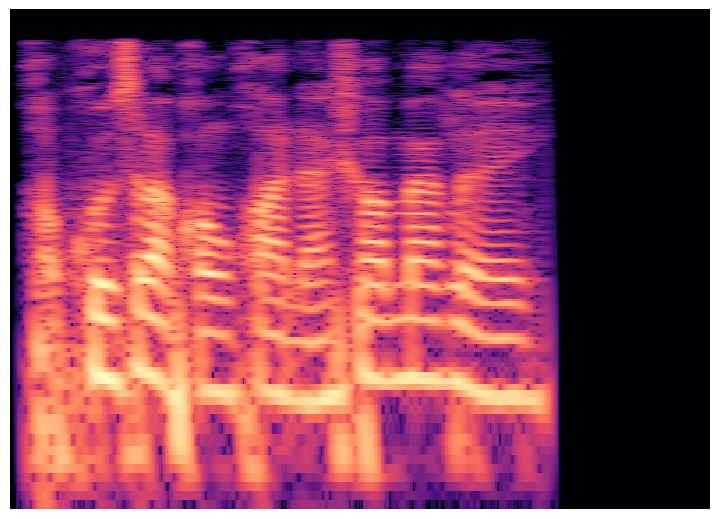

In [113]:
def audio_to_spectrogram_test3(audio_path):
        x, sr = librosa.load(audio_path)

        # Adaptive hop_length and n_fft for varying signal lengths
        hop_length = int(len(x) / 500)
        n_fft = int(len(x) / 20)

        # Extract frequency bands of interest
        bins_per_octave = 24
        n_bins = 24 * bins_per_octave

        X = librosa.stft(x, hop_length=hop_length, n_fft=n_fft)
        Xdb = librosa.amplitude_to_db(abs(X))

        # Create the spectrogram plot
        fig, ax = plt.subplots(figsize=(7, 5))  # Adjust figure size as needed

        chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length, n_fft=n_fft)
        librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="log", cmap="magma", ax=ax)

        # Tightly crop the plot with margins
        ax.margins(0.1)  # Adjust margin value if needed

        # Save the image without whitespace
        filename = os.path.splitext(os.path.basename(audio_path))[0] + ".png"
        plt.axis("off")  # Remove axes labels and ticks
        plt.tight_layout(pad=0)
        plt.show()
audio_to_spectrogram_test3("C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Human augment voice/Jean 1.wav")

In [14]:
import shutil

In [12]:
maleDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/dataTest/maleData/"
femaleDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/dataTest/femaleData/"

In [13]:
HumanDataDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/Human Picture Ver.4/"
AIDataDir = "C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Dataset/AI Picture Ver.4/"

In [15]:
fnames = ['AI{}.png'.format(i+1) for i in range(300, 500)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(maleDir, fname)
  shutil.copyfile(src, dst)

fnames = ['AI{}.png'.format(i+1) for i in range(1500, 1700)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(femaleDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Human{}.png'.format(i+1) for i in range(300, 500)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(maleDir, fname)
  shutil.copyfile(src, dst)

fnames = ['Human{}.png'.format(i+1) for i in range(1500, 1700)]
for fname in fnames:
  src = os.path.join(AIDataDir, fname)
  dst = os.path.join(femaleDir, fname)
  shutil.copyfile(src, dst)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jeant/OneDrive - Chulalongkorn University/Desktop/Senior Project/Convertor code/Model/dataTest/maleData/AI301.png'